In [13]:
from network import Network
import fonts as f
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import time
import pickle

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(10, 10))
plt.rc('figure', facecolor=(1,1,1,1))



In [14]:
font = f.f2
labels = f.font2_labels
dataset = np.array([[x.flatten(), x.flatten()] for x in font])

dataset = dataset[0:10]
labels = labels[0:10]
network = Network(structure=[35, 20, 10, 2, 10, 20, 35], activation=[
                       "relu","relu","lineal","relu","relu", "sigmoid"], seed=17)


In [15]:
errors = []
iteration = 0
tmp = time.time()
def callback(x):
    global iteration
    global tmp
    t = time.time()
    err =network.error(dataset)
    print("\riter: {} time:{:.2f} error:{:.2e}".format(iteration, t-tmp, err), end= "")
    tmp = t
    iteration += 1
    network.reconstruct(x)
    errors.append(err)


In [16]:
network.train(dataset, max_iter=100,method="Powell", tol = 1e-3, callback=callback)


iter: 0 time:3.35 error:1.68e-01

/home/agus/Documents/ITBA/SIA/TPs_SIA/TP5/network.py:22: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-b*x))


iter: 28 time:8.13 error:9.49e-03

In [17]:
with open("weights-1a-{}.pkl".format(time.time()), "wb") as file:
    pickle.dump(network.w, file)

Text(0, 0.5, 'error')

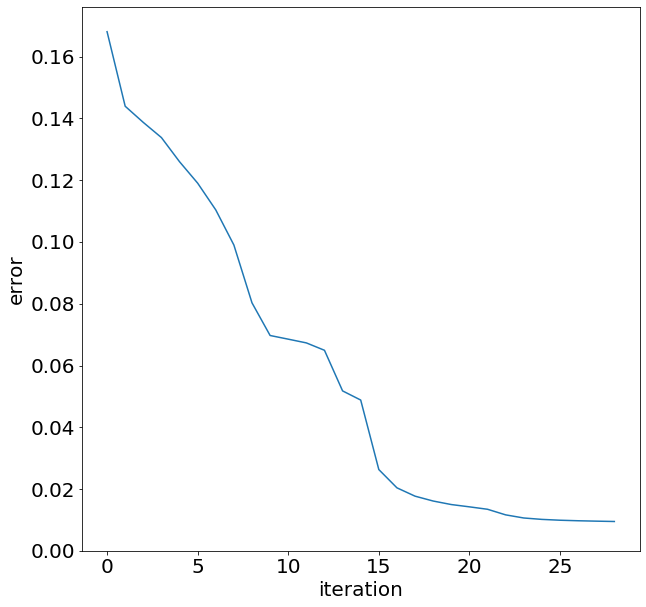

In [18]:
plt.figure("error")
plt.plot(errors)
plt.xlabel("iteration")
plt.ylim(0,)
plt.ylabel("error")

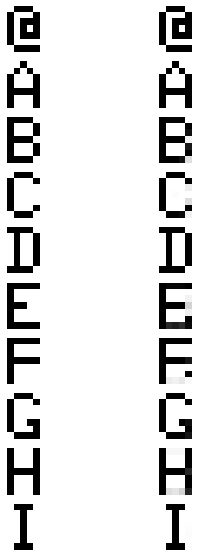

In [19]:
plt.figure("abc", figsize=(5, 10))

for i,letter in enumerate(dataset):
    letter = letter[0]
    plt.subplot(len(dataset), 2, i*2+1)
    plt.imshow(letter.reshape(7, 5), cmap="binary")
    plt.gca().set_axis_off()
    plt.subplot(len(dataset), 2, i*2+2)
    letter = network.feedforward(letter)
    plt.imshow(letter.reshape(7, 5), cmap="binary")
    plt.gca().set_axis_off()

In [20]:
def draw_latent():
    data = np.array([network.encode(x[0]) for x in dataset])
    plt.scatter(data[:,0], data[:,1], s=0)
    for l,p in zip(labels, data):
        plt.annotate(l, (p[0],p[1]), fontsize=30, ha="center", va="center", color="blue")

    plt.xlabel("latent 1")
    plt.ylabel("latent 2")
    return data

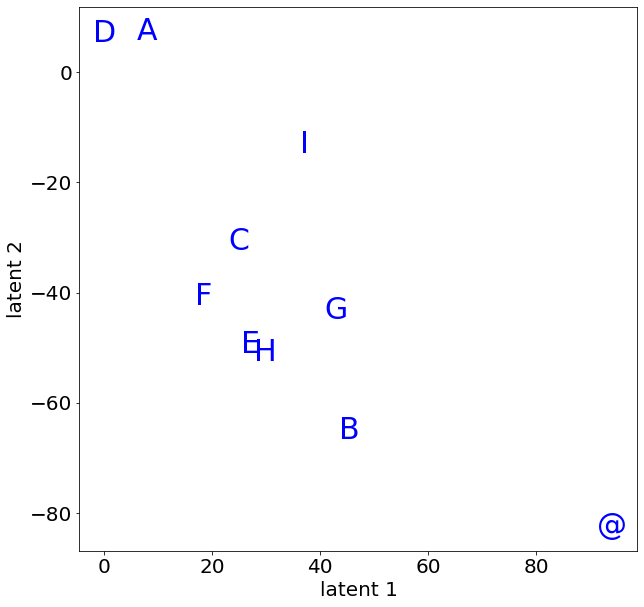

In [21]:
plt.figure("latent")
latent = draw_latent()
plt.show()

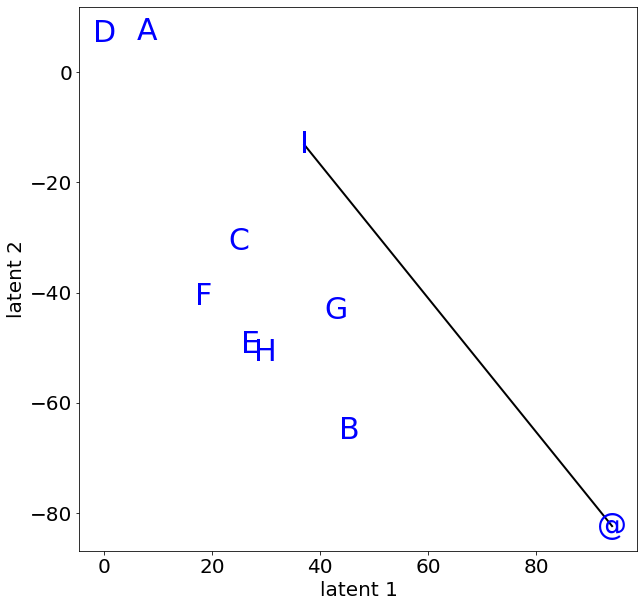

In [22]:
plt.figure("latent")
draw_latent()
line = plt.Line2D([latent[0][0], latent[-1][0]], [latent[0][1],latent[-1][1]], color="black", lw=2)
plt.gca().add_line(line)

 09

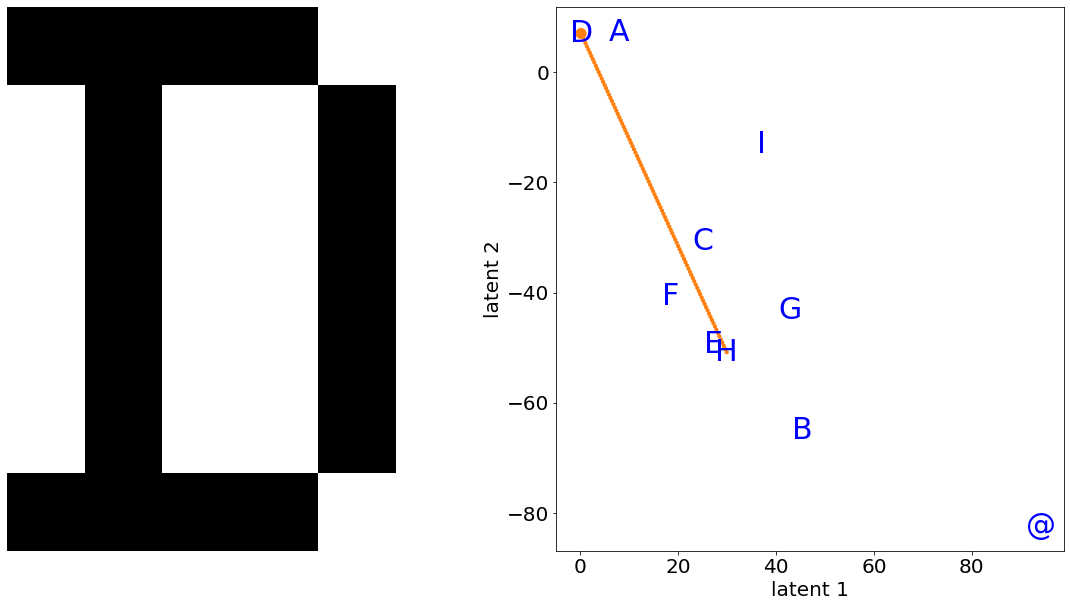

In [27]:
start = labels.index("D")
end = labels.index("H")
x = np.linspace(latent[start][0], latent[end][0], 100)
y = np.linspace(latent[start][1], latent[end][1], 100)
plt.figure("anim", figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.gca().set_axis_off()
img = plt.imshow(network.decode([x[0], y[0]]).reshape(7,5), cmap="binary")
plt.subplot(1, 2, 2)
draw_latent()
scatter = plt.scatter(x,y, s=10)
def update(index):
    encoded = np.array([x[index], y[index]])
    decoded = network.decode(encoded)
    img.set_data(decoded.reshape(7,5))
    sizes = np.zeros(len(x)) + 10
    sizes[index] = 100
    scatter.set_sizes(sizes)
   
    print("\r",index, end="")
    return img, scatter

anim = animation.FuncAnimation(plt.gcf(), update, frames=len(x), interval=100)
anim.save("interpolation.mp4", writer="ffmpeg")
    


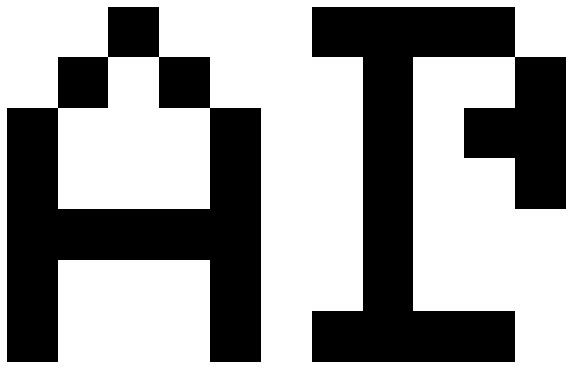

In [24]:
plt.figure("generate")
encoded = network.encode(dataset[1][0])
plt.subplot(1, 2, 1)
plt.imshow(dataset[1][0].reshape(7, 5), cmap="binary")
plt.gca().set_axis_off()
plt.subplot(1, 2, 2)
encoded = encoded + np.random.uniform(-100,100, size=encoded.shape)
decoded = network.decode(encoded)
#decoded = np.where(decoded > 0.5, 1, 0)
plt.imshow(decoded.reshape(7, 5), cmap="binary")
plt.gca().set_axis_off()